In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
#Generate Data
X = np.linspace(-3, 3, 100)
y = 0.5 * X**3 - X**2 + 2*X + 3 + np.random.normal(0, 5, size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.3, random_state=42)

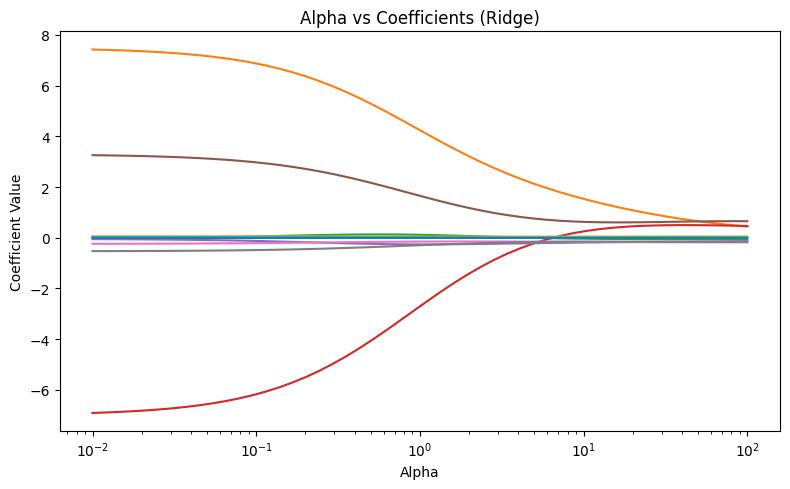

In [3]:
#Alpha vs Coefficients (Ridge)
alphas = np.logspace(-2, 2, 50)
coefficients = []

for alpha in alphas:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=10)),
        ("ridge", Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    coefficients.append(model.named_steps["ridge"].coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(8,5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Alpha vs Coefficients (Ridge)")
plt.tight_layout()
plt.show()

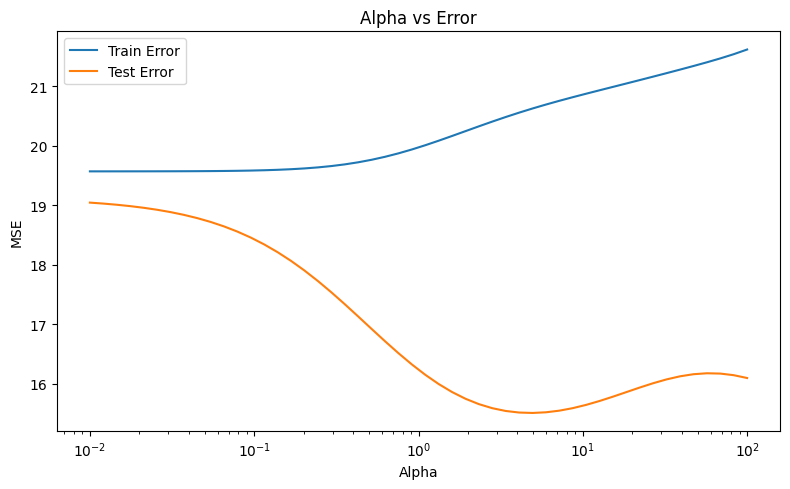

In [4]:
#Alpha vs Error
train_errors = []
test_errors = []

for alpha in alphas:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=10)),
        ("ridge", Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(alphas, train_errors, label="Train Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.title("Alpha vs Error")
plt.tight_layout()
plt.show()